<a href="https://colab.research.google.com/github/arkalim/Tensorflow/blob/master/COCO_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COCO (Common Objects in Context)
COCO dataset contains images of various classes along with segmentation masks, human pose data and description of the image.

In this notebook, we will learn how to use COCO API to access COCO dataset.

## Download COCO dataset and setup COCO API

In [0]:
os.mkdir("coco")
os.chdir('coco')

!wget http://images.cocodataset.org/zips/train2017.zip
!wget http://images.cocodataset.org/zips/val2017.zip    
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip   
!git clone https://github.com/cocodataset/cocoapi.git    

--2019-06-16 12:40:50--  http://images.cocodataset.org/zips/train2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.147.3
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.147.3|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19336861798 (18G) [application/zip]
Saving to: ‘train2017.zip’

train2017.zip       100%[===================>]  18.01G  45.1MB/s    in 7m 3s   

2019-06-16 12:47:58 (43.6 MB/s) - ‘train2017.zip’ saved [19336861798/19336861798]

--2019-06-16 12:48:09--  http://images.cocodataset.org/zips/val2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.1.172
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.1.172|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 815585330 (778M) [application/zip]
Saving to: ‘val2017.zip’

val2017.zip         100%[===================>] 777.80M  45.2MB/s    in 18s     

2019-06-16 12:48:27 (43.9 MB/s) - ‘val20

In [0]:
%%capture 

!unzip train2017.zip
!unzip val2017.zip
!unzip annotations_trainval2017.zip

os.remove('train2017.zip')
os.remove('val2017.zip')
os.remove('annotations_trainval2017.zip')

os.chdir("/content/coco/cocoapi/PythonAPI")

!python setup.py install --user
!make

In [0]:
os.listdir('/content/coco/')

['cocoapi', 'train2017', 'val2017', 'annotations']

loading annotations into memory...
Done (t=15.63s)
creating index...
index created!
Categories ID: [1, 18]
Total Images : 2049
Image ID: [524291, 491525, 311301, 147471, 278550, 581654, 106525, 368676, 491556, 499760, 106545, 122934, 294968, 344127, 74, 245842, 442450, 335955, 24664, 204889, 483425, 548964, 57445, 540774, 450666, 109, 360570, 327804, 327805, 106624, 188546, 327810, 524420, 73864, 532617, 442506, 491660, 262286, 385168, 229522, 360595, 557219, 524453, 516261, 139429, 393384, 516265, 295097, 467130, 254138, 524476, 295103, 442565, 98503, 532693, 82142, 319714, 352482, 565479, 221416, 205035, 139500, 475380, 90359, 540922, 319738, 499966, 98560, 418049, 8458, 74001, 262418, 418065, 172310, 24861, 57631, 336172, 74030, 573744, 524594, 475443, 467252, 368949, 491831, 237881, 467257, 573759, 287041, 516422, 442695, 237897, 221523, 155997, 450910, 295263, 41311, 426342, 57703, 459111, 57702, 24935, 573807, 467318, 237944, 524665, 311683, 500100, 16775, 82312, 442761, 401808, 

(-0.5, 639.5, 425.5, -0.5)

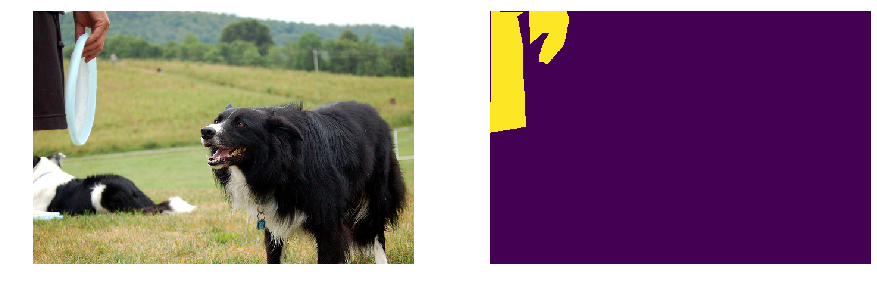

In [0]:
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import cv2


dataDir='/content/coco'
datatype='train2017'
annFile='{}/annotations/instances_{}.json'.format(dataDir,datatype)
coco=COCO(annFile)

# Get the category IDs for the given category names
catIds = coco.getCatIds(catNms=['dog','person'])
print('Categories ID: '+ str(catIds))

# Get the image IDs for the above gategories
imgIds = coco.getImgIds(catIds=catIds);
print('Total Images : ' + str(len(imgIds)))
print('Image ID: ' + str(imgIds))

# load image for the given image ID
img = coco.loadImgs(imgIds[0])[0]

image = io.imread('/content/coco/'+ datatype +'/'+img['file_name'])

# get annotations IDs for the given image IDs
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
print('Annotation ID: ' + str(annIds))

# load annotations for the given ID
anns = coco.loadAnns(annIds)

# uncomment this line to see segmentation overlay
#coco.showAnns(anns)

# convert the annotations to mask
mask = []
for i in range(len(anns)):
    
    mask.append(np.expand_dims(coco.annToMask(anns[i]), axis = 2))
   
 # Concatenate the masks along the third axis to convert it into one hot encoded mask
mask = np.concatenate(mask, axis = 2)
    
print('Mask Shape: ' + str(mask.shape))    

plt.figure(figsize = (15 , 8))

plt.subplot(1,2,1)
plt.imshow(image)
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(mask[:,:,])
plt.axis('off')